<a href="https://colab.research.google.com/github/gowthamp-04/Data-Analytics/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
100% 3.10G/3.10G [03:20<00:00, 21.3MB/s]
100% 3.10G/3.10G [03:20<00:00, 16.6MB/s]


In [2]:
import zipfile
import os

# Assuming you downloaded a zip file
with zipfile.ZipFile('breast-histopathology-images.zip', 'r') as zip_ref:
    zip_ref.extractall('breast_histopathology_images')


In [3]:
dataset_path = '/content/breast_histopathology_images'


In [4]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing import image


In [5]:
import os
print(os.listdir(dataset_path)[:10])


['12873', '9228', '10253', '10299', '15516', '12898', '10285', '16553', '14189', '12869']


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image generator with preprocessing
datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the directory
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'  # Assuming binary classification (cancer vs no cancer)
)


Found 555048 images belonging to 280 classes.


In [7]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model with pre-trained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model's layers (optional)
base_model.trainable = False

# Define your custom model on top of the base model
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
!pip install tensorflow


In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Try smaller image sizes, like 64x64
target_size = (64, 64)
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,  # Resize to smaller dimensions
    batch_size=64,
    class_mode='binary'
)


Found 555048 images belonging to 280 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Reduce filters from 32 to 16
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),  # Reduce filters from 64 to 32
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  # Reduce neurons from 512 to 128
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])


In [21]:
model.save('breast_cancer_classifier.h5')


In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('newpig2.jpg', target_size=(150, 150))  # Resize to match input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Reshape to match input shape (1, 150, 150, 3)

prediction = model.predict(img_array)
print(f"Prediction: {'Cancerous' if prediction[0] > 0.5 else 'Non-cancerous'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: Cancerous


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80% training, 20% validation

# Load training data
train_data = train_datagen.flow_from_directory(
    '/content/breast_histopathology_images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Set as training data
)

# Load validation data
validation_data = train_datagen.flow_from_directory(
    '/content/breast_histopathology_images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Set as validation data
)



Found 444147 images belonging to 280 classes.
Found 110901 images belonging to 280 classes.


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Define your model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now you can fit the model
history = model.fit(train_data, validation_data=validation_data, epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13880/13880 ━━━━━━━━━━━━━━━━━━━━ 743s 53ms/step - accuracy: 0.0015 - loss: -13390614364160.0000 - val_accuracy: 0.0015 - val_loss: -158592002949120.0000
Epoch 2/10
13880/13880 ━━━━━━━━━━━━━━━━━━━━ 642s 46ms/step - accuracy: 0.0016 - loss: -305743152545792.0000 - val_accuracy: 0.0015 - val_loss: -946985125281792.0000
Epoch 3/10
13880/13880 ━━━━━━━━━━━━━━━━━━━━ 627s 45ms/step - accuracy: 0.0015 - loss: -1357319589855232.0000 - val_accuracy: 0.0015 - val_loss: -2798313464135680.0000
Epoch 4/10
13880/13880 ━━━━━━━━━━━━━━━━━━━━ 667s 48ms/step - accuracy: 0.0016 - loss: -3607458996027392.0000 - val_accuracy: 0.0015 - val_loss: -6134954371055616.0000
Epoch 5/10
13880/13880 ━━━━━━━━━━━━━━━━━━━━ 680s 49ms/step - accuracy: 0.0015 - loss: -7481982279745536.0000 - val_accuracy: 0.0015 - val_loss: -11371139590782976.0000
Epoch 6/10
13880/13880 ━━━━━━━━━━━━━━━━━━━━ 685s 49ms/step - accuracy: 0.0017 - loss: -13403776887029760.0000 - val_accuracy: 0.0015 - val_loss: -18928524316377088.0000
Epoch 7/10


In [32]:
test_loss, test_acc = model.evaluate(validation_data)
print(f"Validation accuracy: {test_acc}")

3466/3466 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.0014 - loss: -81001287906230272.0000
Validation accuracy: 0.001523881684988737


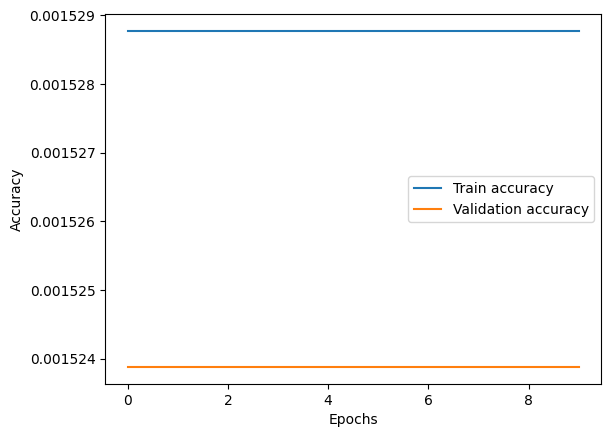

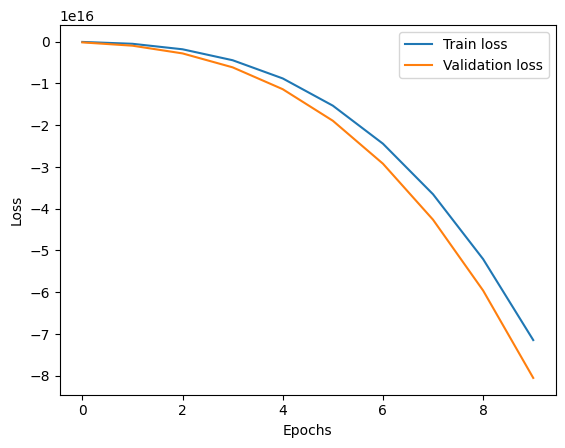

In [33]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [34]:
model.save('breast_cancer_classifier.h5')
